h2s:   0%|          | 0/5 [00:00<?, ?it/s]

sim_out:   0%|          | 0/10 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

sim_out:   0%|          | 0/10 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

sim_out:   0%|          | 0/10 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

sim_out:   0%|          | 0/10 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

sim_out:   0%|          | 0/10 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

k:   0%|          | 0/4 [00:00<?, ?it/s]

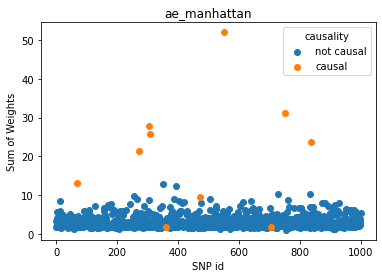

In [1]:
from FADS_SRP.models import supervised_autoencoder, nn, lr
from FADS_SRP.input import get_dsets_
from FADS_SRP.auc import calculate_auc
from FADS_SRP.thresholding import *

import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.svm import SVC
import silence_tensorflow.auto


def get_dset(h2s, sim_i):
    P = f"/home/shussain/Simulated_data/15042021/{h2s}/simulation_output{sim_i}"
    return get_dsets_(P)

def get_learnt_rep(ae, X):
    out = X
    for L in ae.layers:
        out = L(out)
        if L.name == "latent_dim":
            return out.numpy()

H2S = [0.05, 0.25, 0.5, 0.75, 1]
K = [5, 25, 100, 300]

with open("/home/shussain/final_report/p_vs_sae_results/thresholding/experiment3/results.csv", 'w') as t:
    t.writelines("h2s,simulation,k,ae_precision,ae_recall,p_precision,p_recall\n")


for h2s in tqdm(H2S, desc="h2s"):
    for i in trange(1, 11, desc="sim_out"):
        #get dataset
        dset = get_dset(h2s, i)
        #train sae
        hist, ae = supervised_autoencoder(dset["X_train"], dset["y_train"], sizes=[300], 
                                         input_shape=1000, reconstruction_weight=0.3, 
                                         dropout=True, activation="relu", l1=1e-2)
        #generate sum of weights and add it to ct
        dset["ct"] = ae_ct(dset["ct"], ae)        
        
        plt.clf()
        manhattan_plot(dset["ct"])
        plt.savefig(f"/home/shussain/final_report/p_vs_sae_results/thresholding/experiment3/plots/simulation_output{i}/{h2s}/p_manhattan.jpeg")
        plt.clf()
        ae_thresh_plot(dset["ct"])
        plt.savefig(f"/home/shussain/final_report/p_vs_sae_results/thresholding/experiment3/plots/simulation_output{i}/{h2s}/ae_manhattan.jpeg")
        
        for k in tqdm(K, desc="k"):
            ct = dset["ct"].sort_values(by="logistic_p")
            k_p_SNPs_index = ct[:k].index.values
            
            p_lr = list(ct["logistic_p"])[k]
            
            ct = dset["ct"].sort_values(by="weights", ascending=False)
            k_ae_SNPs_index = ct[:k].index.values
            
            p_ae = list(ct["weights"])[k]
            
            ae_precision = ae_thresholding_precision(p_ae, dset["ct"])
            ae_recall = ae_thresholding_recall(p_ae, dset["ct"])
            
            p_precision = thresholding_precision(p_lr, dset["ct"])
            p_recall = thresholding_recall(p_lr, dset["ct"])
            
            with open("/home/shussain/final_report/p_vs_sae_results/thresholding/experiment3/results.csv", 'a') as t:
                t.writelines(f"{h2s},{i},{k},{ae_precision},{ae_recall},{p_precision},{p_recall}\n")
            
            

In [42]:
from sklearn.metrics import recall_score, precision_score
k=10
thresh = list(ct["weights"])[k]
precision_score(ct["causal"], ct["weights"] > thresh, zero_division=1)

0.6

In [40]:
thresh

3.365997314453125

In [21]:
ct["weights"][k]

2.7364242

In [41]:
k

300

In [36]:
ct[:k]

,Unnamed: 0,SNP,causal,logistic_p,weights
552,552,SNP_553,1,9.331615e-20,39.955154
750,750,SNP_751,1,4.303268e-09,25.112297
67,67,SNP_68,1,4.123312e-12,23.007629
304,304,SNP_305,1,2.387730e-08,20.592520
471,471,SNP_472,1,2.215127e-05,19.170532
...,...,...,...,...,...
860,860,SNP_861,0,4.938253e-01,3.388037
370,370,SNP_371,0,8.601875e-01,3.374140
260,260,SNP_261,0,1.782349e-01,3.371099
886,886,SNP_887,0,5.060092e-01,3.369644


In [28]:
ct = dset["ct"].sort_values(by="weights", ascending=False)
ct

,Unnamed: 0,SNP,causal,logistic_p,weights
67,67,SNP_68,1,0.000852,13.149077
373,373,SNP_374,0,0.014826,12.482474
663,663,SNP_664,0,0.000843,10.916180
265,265,SNP_266,0,0.009403,10.721377
841,841,SNP_842,0,0.043926,10.685034
...,...,...,...,...,...
889,889,SNP_890,0,0.752649,2.034678
72,72,SNP_73,0,0.450550,2.022992
70,70,SNP_71,0,0.355158,1.993380
850,850,SNP_851,0,0.985029,1.933685


In [33]:
ct["causal"] == 1

67      True
373    False
663    False
265    False
841    False
       ...  
889    False
72     False
70     False
850    False
975    False
Name: causal, Length: 1000, dtype: bool

In [29]:
list(ct["weights"])[k]

10.154924392700195

In [27]:
ct

,Unnamed: 0,SNP,causal,logistic_p,weights
67,67,SNP_68,1,0.000852,13.149077
373,373,SNP_374,0,0.014826,12.482474
663,663,SNP_664,0,0.000843,10.916180
265,265,SNP_266,0,0.009403,10.721377
841,841,SNP_842,0,0.043926,10.685034
...,...,...,...,...,...
889,889,SNP_890,0,0.752649,2.034678
72,72,SNP_73,0,0.450550,2.022992
70,70,SNP_71,0,0.355158,1.993380
850,850,SNP_851,0,0.985029,1.933685


In [18]:
pd.read_csv("/home/shussain/final_report/p_vs_sae_results/thresholding/experiment3/results.csv")

NameError: name 'pd' is not defined

In [16]:
ct["Unnamed: 0"][k]

5

In [2]:
def get_dset(h2s, sim_i):
    P = f"/home/shussain/Simulated_data/15042021/{h2s}/simulation_output{sim_i}"
    return get_dsets_(P)

def get_learnt_rep(ae, X):
    out = X
    for L in ae.layers:
        out = L(out)
        if L.name == "latent_dim":
            return out.numpy()

## Thresholding techniques. $p$ vs AE
This section explores how $p$ thresholding compares to AE thresholding with varying h2s values. Comparison will be based on AUC of different classifiers and how much each method captures the causal SNPs (only relevant for h2s closer to 1.) For AE, rw will be pegged to always be 0.4 and latent_dim=300. The datasets used here have $n=600$ (value found by some previous experiment) and $d=1000.$

In [3]:
dset = get_dset(1, 10)
hist, ae = supervised_autoencoder(dset["X_train"], dset["y_train"], sizes=[300], 
                                 input_shape=1000, reconstruction_weight=0.3, 
                                 dropout=True, activation="relu", l1=1e-2)

dset["ct"] = ae_ct(dset["ct"], ae)        

In [8]:
k=100
k_ae_SNPs_index = ae_get_n_SNPs(dset["ct"], k)
k_p_SNPs_index = get_n_SNPs(dset["ct"], k)

k_ae_SNPs_index, k_p_SNPs_index

(array([552, 750, 304, 837, 308, 272, 352,  67, 893, 612, 394, 305, 386,
        605, 667, 881, 471, 728, 832,  11, 476, 638, 873, 979, 521, 505,
        701, 243, 952, 525, 419,   4, 403, 834, 761, 195, 646, 289, 663,
        844, 921, 412, 108, 951,  21, 861, 173, 994, 968, 404, 779, 908,
        169,  92, 913, 831, 568, 926, 161, 809, 410, 506, 280, 916, 757,
        129, 414, 109, 156, 364, 928, 821, 794, 760, 842, 189, 595, 623,
        838, 652,  35, 534, 594, 781, 407, 970, 346, 302, 710, 431, 763,
        749, 960, 158,  28, 634, 374, 580, 675, 380]),
 array([552, 750, 304, 837,  67, 308, 272, 471, 276,  94, 962, 160, 534,
        663, 342, 735, 581, 419, 646, 979, 945, 305, 152, 301, 766, 761,
        285, 803, 907, 352, 230, 728,  19, 395, 269, 554, 506, 243, 606,
        781, 873, 652, 219, 854,  35, 861, 498, 736, 619, 462, 180, 879,
         58,  13, 732, 771, 593, 598, 596,  56, 928, 476, 389, 980,  65,
        186, 802, 381, 505, 881, 268,  71, 733, 204, 923, 258, 621,  

In [12]:
dset["ct"].sort_values("weights", ascending=False)

,Unnamed: 0,SNP,causal,logistic_p,weights
552,552,SNP_553,1,3.703517e-25,52.543175
750,750,SNP_751,1,1.192161e-12,30.303740
304,304,SNP_305,1,6.398778e-12,27.226284
837,837,SNP_838,1,4.404863e-10,25.613796
308,308,SNP_309,1,4.942673e-08,25.162579
...,...,...,...,...,...
641,641,SNP_642,0,5.757753e-01,1.056284
704,704,SNP_705,0,5.005700e-01,1.042476
466,466,SNP_467,0,6.746515e-01,1.041536
227,227,SNP_228,0,9.738880e-01,1.037744


In [11]:
dset["ct"].sort_values("logistic_p", ascending=True)

,Unnamed: 0,SNP,causal,logistic_p,weights
552,552,SNP_553,1,3.703517e-25,52.543175
750,750,SNP_751,1,1.192161e-12,30.303740
304,304,SNP_305,1,6.398778e-12,27.226284
837,837,SNP_838,1,4.404863e-10,25.613796
67,67,SNP_68,1,3.279918e-08,12.397985
...,...,...,...,...,...
756,756,SNP_757,0,9.937949e-01,1.779884
805,805,SNP_806,0,9.949492e-01,2.613354
134,134,SNP_135,0,9.962170e-01,3.805006
221,221,SNP_222,0,9.999366e-01,1.603489


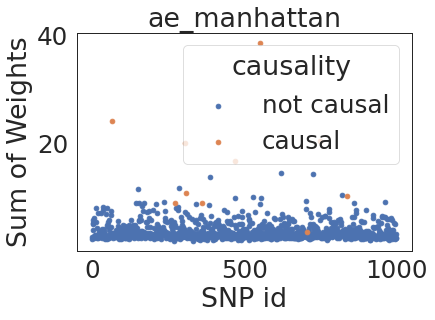

In [30]:
dset = get_dset(0.75, 1)
#train sae
hist, ae = supervised_autoencoder(dset["X_train"], dset["y_train"], sizes=[300], 
                                 input_shape=1000, reconstruction_weight=0.3, 
                                 dropout=True, activation="relu", l1=1e-2)
#generate sum of weights and add it to ct
dset["ct"] = ae_ct(dset["ct"], ae) 

plt.clf()
manhattan_plot(dset["ct"])
#plt.savefig(f"p_vs_sae_results/thresholding/plots/simulation_output{i}/{h2s}/p_manhattan.jpeg")
plt.clf()
ae_thresh_plot(dset["ct"])
#plt.savefig(f"p_vs_sae_results/thresholding/plots/simulation_output{i}/{h2s}/ae_manhattan.jpeg")

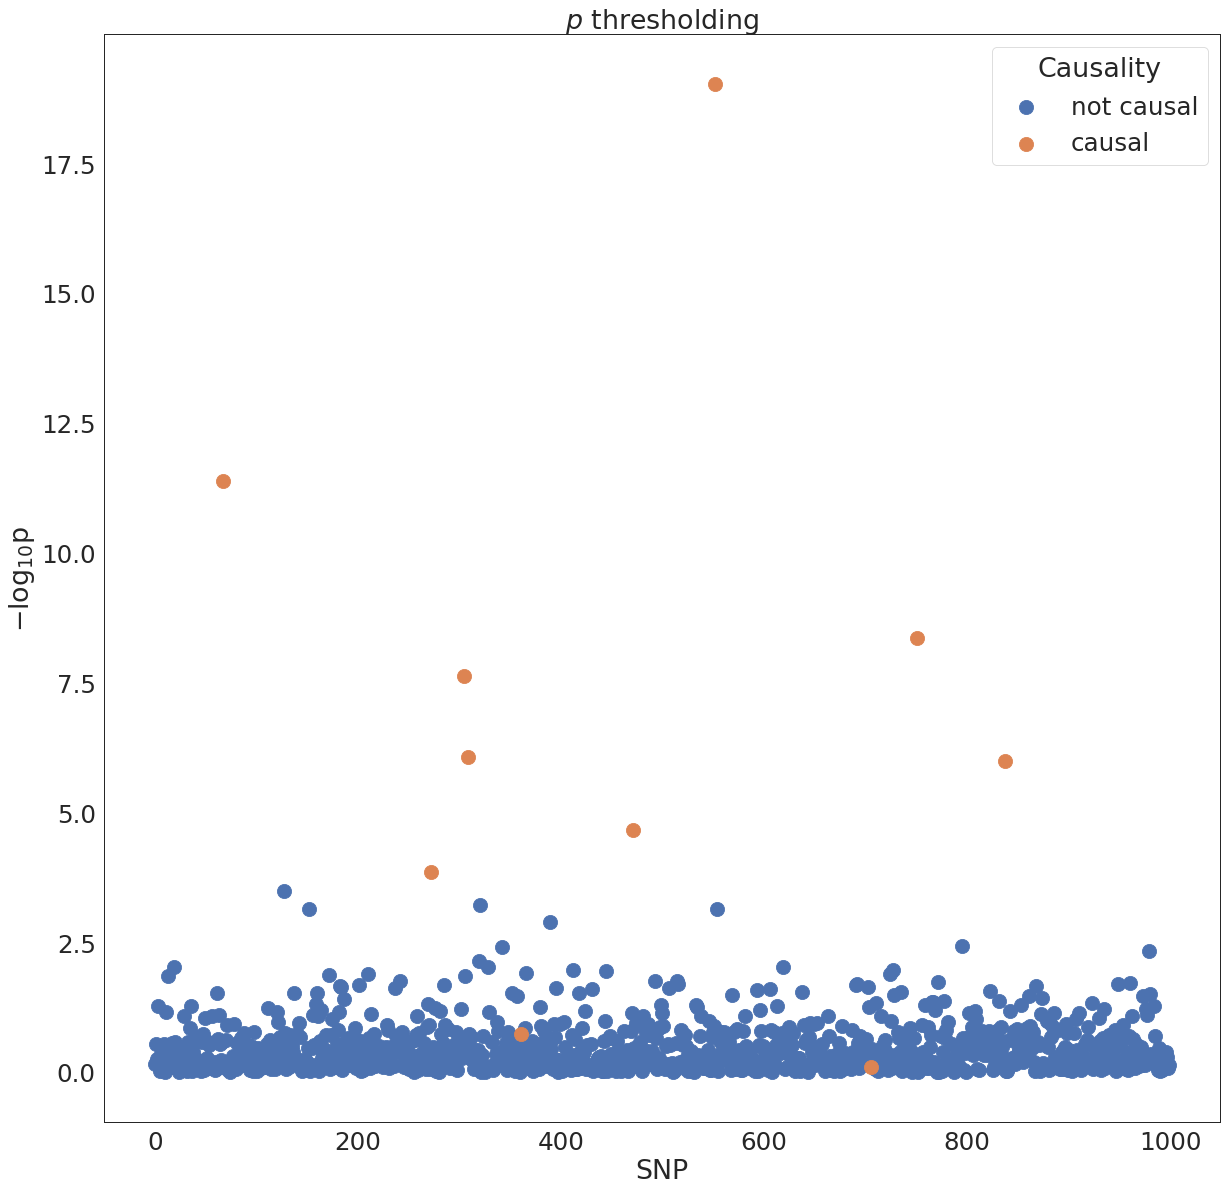

In [48]:
method = "logistic" if 1 else "chi2"
plt.subplots(1, 1, figsize=(20, 20))

groups = ct.groupby("causal")
for is_causal, group in groups:
    plt.scatter(group.index, -log10(group[f"{method}_p"]), label="causal" if is_causal else "not causal", s=200)
plt.xlabel("SNP")
plt.ylabel("$-\log_{10}$p")
plt.title("$p$ thresholding")
if 1:
    plt.legend(title="Causality")
plt.savefig("/home/shussain/final_report/p_vs_sae_results/thresholding/experiment3/p_manhattan.jpeg")

<Figure size 432x288 with 0 Axes>

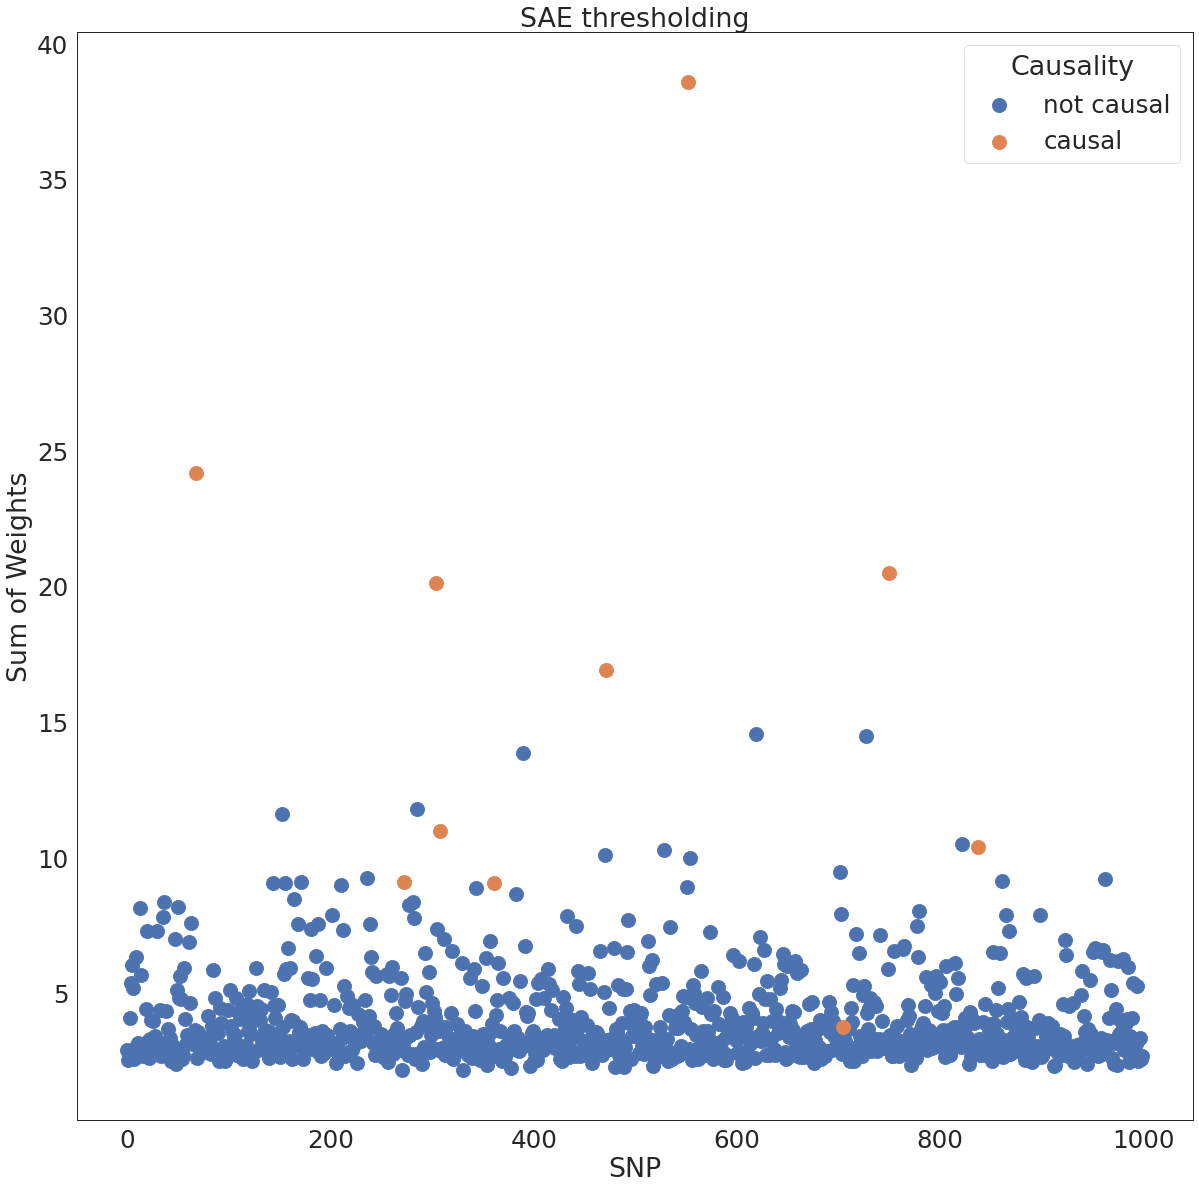

In [49]:
plt.clf()
ct=dset["ct"]
groups = ct.groupby("causal")
plt.subplots(1, 1, figsize=(20, 20))
for is_causal, group in groups:
    plt.scatter(group.index, group["weights"], label="causal" if is_causal else "not causal", s=200)

plt.legend(title="Causality")
plt.title("SAE thresholding")
plt.xlabel("SNP")
plt.ylabel("Sum of Weights")
plt.savefig("/home/shussain/final_report/p_vs_sae_results/thresholding/experiment3/ae_manhattan.jpeg")

In [27]:
from FADS_SRP.models import supervised_autoencoder, nn, lr
from FADS_SRP.input import get_dsets_
from FADS_SRP.auc import calculate_auc
from FADS_SRP.thresholding import *

import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.svm import SVC
import silence_tensorflow.auto


def get_dset(h2s, sim_i):
    P = f"/home/shussain/Simulated_data/15042021/{h2s}/simulation_output{sim_i}"
    return get_dsets_(P)

def get_learnt_rep(ae, X):
    out = X
    for L in ae.layers:
        out = L(out)
        if L.name == "latent_dim":
            return out.numpy()

H2S = [1]#[0.05, 0.25, 0.5, 0.75, 1]
K = [300]#[5, 25, 100, 300]

learnt = False

with open("p_vs_sae_results/learnt_representation.csv", 'w') as t:
    t.writelines("h2s,simulation,sae,learnt_svm,learnt_lr,learnt_nn\n")
    
with open("p_vs_sae_results/thresholding/thresholding.csv", 'w') as t:
    t.writelines("h2s,simulation,k,p_svm,ae_svm,p_lr,ae_lr,p_nn,ae_nn\n")

for h2s in tqdm(H2S, desc="h2s"):
    for i in trange(1, 11, desc="sim_out"):
        #get dataset
        dset = get_dset(h2s, i)
        #train sae
        hist, ae = supervised_autoencoder(dset["X_train"], dset["y_train"], sizes=[300], 
                                         input_shape=1000, reconstruction_weight=0.3, 
                                         dropout=True, activation="relu", l1=1e-2)
        #generate sum of weights and add it to ct
        dset["ct"] = ae_ct(dset["ct"], ae)        
        #calculate auc of supervised part of sae (logistic regression)
        sae_auc = calculate_auc(
            lambda X: ae.predict(X)[0][:, 1],
            dset["X_test"],
            dset["y_test"][:, 1]
        )
        #obtain the latent representation of the dataset. this will have d=300
        dset["X_train_learnt"] = get_learnt_rep(ae, dset["X_train"])
        dset["X_test_learnt"] = get_learnt_rep(ae, dset["X_test"])
        #train SVM on learnt representation
        learnt_svm = SVC(probability=True)
        learnt_svm.fit(dset["X_train_learnt"], dset["y_train"][:, 1])
        
        learnt_svm_auc = calculate_auc(
            lambda X: learnt_svm.predict_proba(X)[:, 1],
            dset["X_test_learnt"],
            dset["y_test"][:, 1]
        )
        #train LR on learnt representation
        hist, learnt_lr = lr(dset["X_train_learnt"], dset["y_train"])
        
        learnt_lr_auc = calculate_auc(
            lambda X: learnt_lr.predict(X)[:, 1],
            dset["X_test_learnt"],
            dset["y_test"][:, 1]
        )
        #train NN on learnt representation
        hist, model = nn(dset["X_train_learnt"], dset["y_train"])
        
        learnt_nn_auc = calculate_auc(
            lambda X: model.predict(X)[:, 1],
            dset["X_test_learnt"],
            dset["y_test"][:, 1]
        )
        
        with open("p_vs_sae_results/learnt_representation.csv", 'a') as t:
            t.writelines(f"{h2s},{i},{sae_auc},{learnt_svm_auc},{learnt_lr_auc},{learnt_nn_auc}\n")
        
        plt.clf()
        manhattan_plot(dset["ct"])
        plt.savefig(f"p_vs_sae_results/thresholding/plots/simulation_output{i}/{h2s}/p_manhattan.jpeg")
        plt.clf()
        ae_thresh_plot(dset["ct"])
        plt.savefig(f"p_vs_sae_results/thresholding/plots/simulation_output{i}/{h2s}/ae_manhattan.jpeg")
        
        for k in tqdm(K, desc="k"):
            k_p_SNPs_index = get_n_SNPs(dset["ct"], k)
            k_ae_SNPs_index = ae_get_n_SNPs(dset["ct"], k)
            
            #train SVM on p thresholded data
            p_thresh_svm = SVC(probability=True)
            p_thresh_svm.fit(dset["X_train"][:, k_p_SNPs_index], dset["y_train"][:, 1])

            p_thresh_svm_auc = calculate_auc(
                lambda X: p_thresh_svm.predict_proba(X)[:, 1],
                dset["X_test"][:, k_p_SNPs_index],
                dset["y_test"][:, 1]
            )
            #train SVM on ae thresholded data
            ae_thresh_svm = SVC(probability=True)
            ae_thresh_svm.fit(dset["X_train"][:, k_ae_SNPs_index], dset["y_train"][:, 1])

            ae_thresh_svm_auc = calculate_auc(
                lambda X: ae_thresh_svm.predict_proba(X)[:, 1],
                dset["X_test"][:, k_ae_SNPs_index],
                dset["y_test"][:, 1]
            )
            #train LR on p thresh data
            hist, p_thresh_lr = lr(dset["X_train"][:, k_p_SNPs_index], dset["y_train"])

            p_thresh_lr_auc = calculate_auc(
                lambda X: p_thresh_lr.predict(X)[:, 1],
                dset["X_test"][:, k_p_SNPs_index],
                dset["y_test"][:, 1]
            )
            #train LR on ae thresh data
            hist, ae_thresh_lr = lr(dset["X_train"][:, k_ae_SNPs_index], dset["y_train"])

            ae_thresh_lr_auc = calculate_auc(
                lambda X: ae_thresh_lr.predict(X)[:, 1],
                dset["X_test"][:, k_ae_SNPs_index],
                dset["y_test"][:, 1]
            )
            #train NN on p thresh data
            hist, p_thresh_nn = nn(dset["X_train"][:, k_p_SNPs_index], dset["y_train"])

            p_thresh_nn_auc = calculate_auc(
                lambda X: p_thresh_nn.predict(X)[:, 1],
                dset["X_test"][:, k_p_SNPs_index],
                dset["y_test"][:, 1]
            )
            #train NN on ae thresh data
            hist, ae_thresh_nn = nn(dset["X_train"][:, k_ae_SNPs_index], dset["y_train"])

            ae_thresh_nn_auc = calculate_auc(
                lambda X: ae_thresh_nn.predict(X)[:, 1],
                dset["X_test"][:, k_ae_SNPs_index],
                dset["y_test"][:, 1]
            )
            
            with open("p_vs_sae_results/thresholding/thresholding.csv", 'a') as t:
                t.writelines(f"{h2s},{i},{k},{p_thresh_svm_auc},{ae_thresh_svm_auc},
                             {p_thresh_lr_auc},{ae_thresh_lr_auc},{p_thresh_nn_auc},{ae_thresh_nn_auc}\n")


h2s:   0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
ae_thresh_svm = SVC(probability=True)
ae_thresh_svm.fit(dset["X_train"][:, k_ae_SNPs_index], dset["y_train"][:, 1])

ae_thresh_svm_auc = calculate_auc(
    lambda X: ae_thresh_svm.predict_proba(X)[:, 1],
    dset["X_test"][:, k_ae_SNPs_index],
    dset["y_test"][:, 1]
)

In [43]:
list(range(1, 11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [8]:
import pandas as pd
import seaborn as sns

thresholding = pd.read_csv("/home/shussain/final_report/p_vs_sae_results/thresholding/experiment1/thresholding.csv")
thresholding

,h2s,simulation,k,p_svm,ae_svm,p_lr,ae_lr,p_nn,ae_nn
0,0.05,1,5,0.587580,0.554442,0.589112,0.476747,0.531468,0.455862
1,0.05,1,25,0.719855,0.574770,0.739070,0.593428,0.458925,0.414091
2,0.05,1,100,0.821498,0.659705,0.812309,0.599276,0.510721,0.511000
3,0.05,1,300,0.886104,0.653300,0.880813,0.597048,0.506266,0.497354
4,0.05,2,5,0.627644,0.432432,0.629553,0.461810,0.506463,0.396886
...,...,...,...,...,...,...,...,...,...
195,1.00,9,300,0.934722,0.757222,0.899167,0.599722,0.455000,0.522222
196,1.00,10,5,0.885802,0.876493,0.901917,0.912892,0.252014,0.769241
197,1.00,10,25,0.943040,0.944151,0.949708,0.927202,0.457627,0.564879
198,1.00,10,100,0.978883,0.865935,0.970270,0.807169,0.501250,0.562656


Text(0.5, 1.0, '$p$')

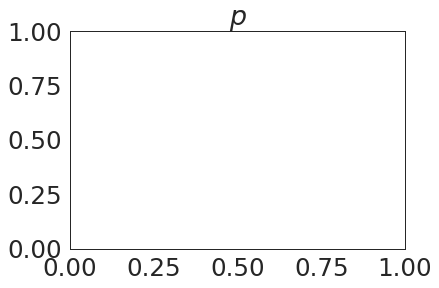

In [26]:
plt.title("$p$")

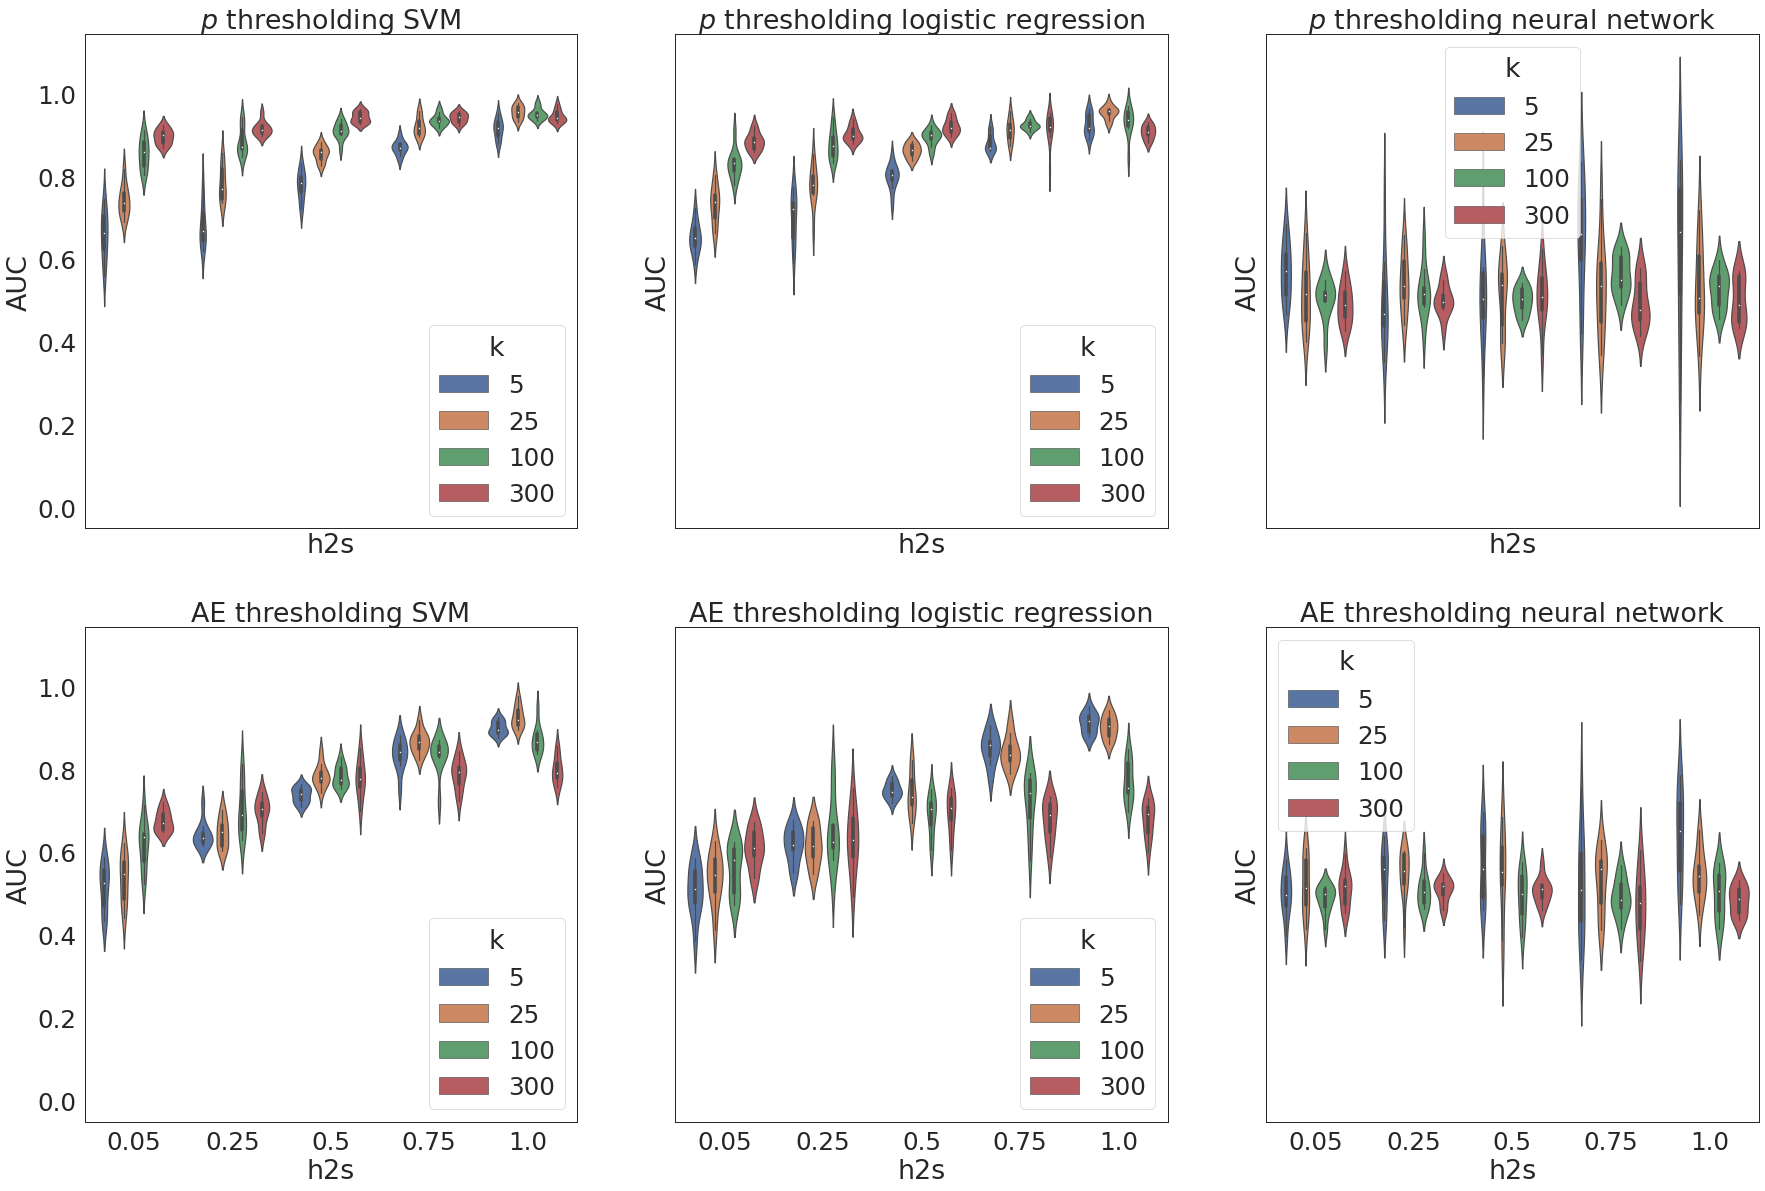

In [29]:
sns.set_theme(context="paper", style="white", font_scale=2.8)
fig, axes = plt.subplots(2, 3, figsize=(30, 20), sharex=True, sharey=True)
titles = [
    "$p$ thresholding SVM", "$p$ thresholding logistic regression", "$p$ thresholding neural network", 
    "AE thresholding SVM", "AE thresholding logistic regression", "AE thresholding neural network"
]
for method, title, ax in zip(["p_svm", "p_lr", "p_nn", "ae_svm", "ae_lr", "ae_nn"], titles, axes.ravel()):
    plt.sca(ax)
    sns.violinplot(x="h2s", y=method, hue="k", data=thresholding)
    ax.set_title(title)
    ax.set_ylabel("AUC")
    
plt.savefig("/home/shussain/final_report/p_vs_sae_results/thresholding/experiment1/violins2.jpeg")

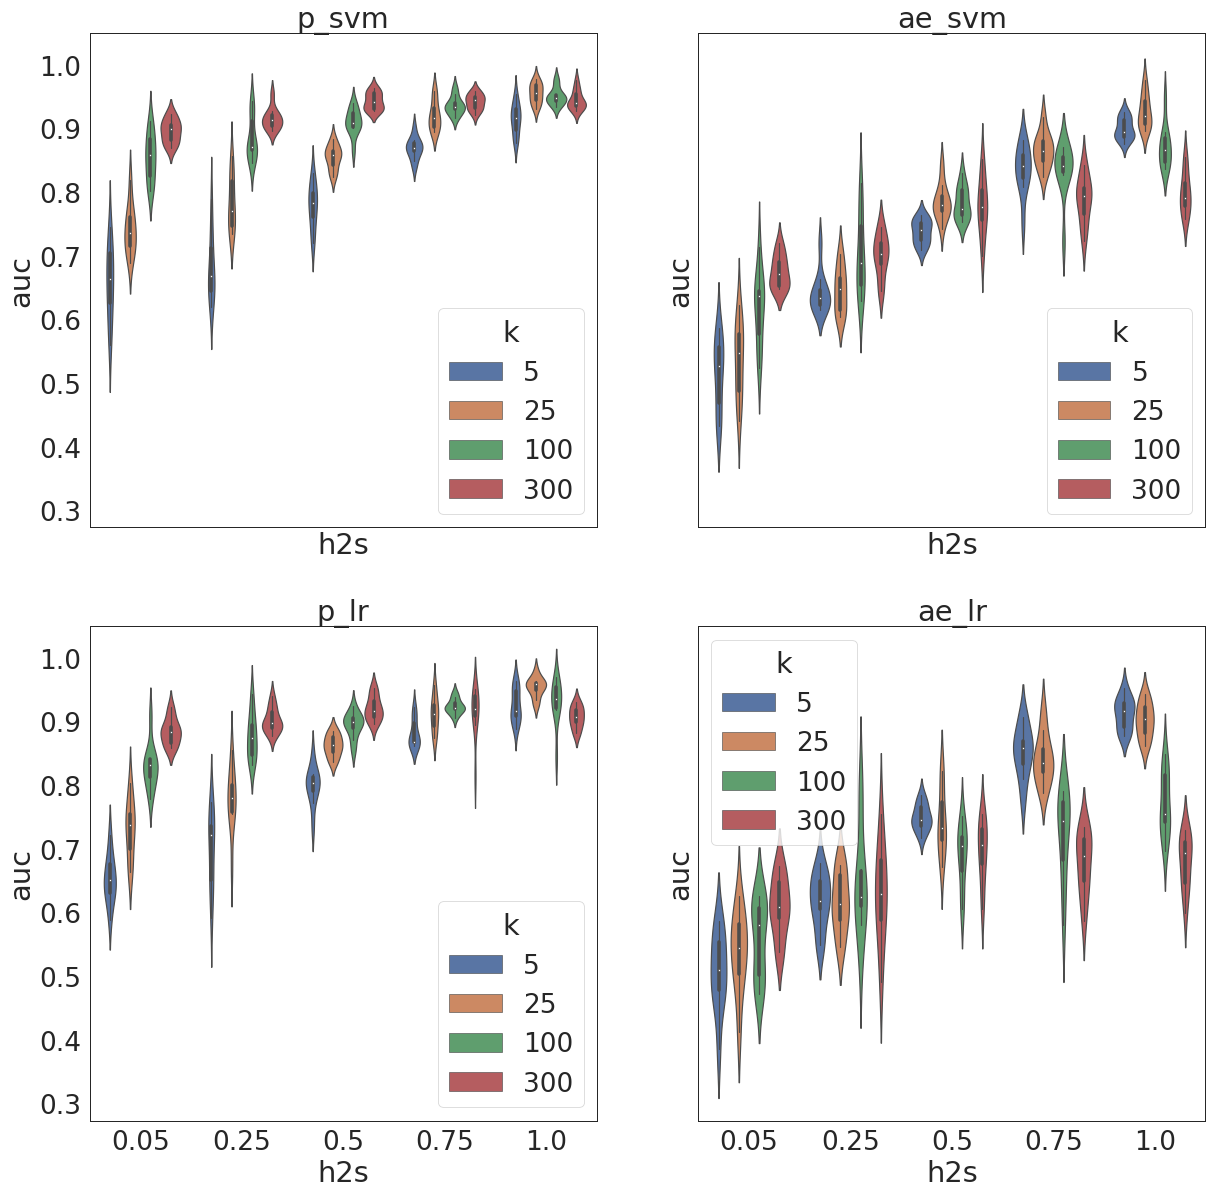

In [17]:
sns.set_theme(context="paper", style="white", font_scale=3)
fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharex=True, sharey=True)
for method, ax in zip(["p_svm", "ae_svm", "p_lr", "ae_lr"], axes.ravel()):
    plt.sca(ax)
    sns.violinplot(x="h2s", y=method, hue="k", data=thresholding)
    ax.set_title(method)
    ax.set_ylabel("auc")


In [61]:
learnt = pd.read_csv("/home/shussain/final_report/p_vs_sae_results/learnt/experiment1/learnt_representation.csv")
learnt.head(10)

,h2s,simulation,k,sae,learnt_svm,learnt_lr,learnt_nn
0,0.05,1,5,0.684907,0.679059,0.684907,0.684907
1,0.05,2,5,0.644536,0.593420,0.578437,0.643948
2,0.05,3,5,0.717263,0.744016,0.728809,0.738947
3,0.05,4,5,0.717762,0.652028,0.701259,0.712168
4,0.05,5,5,0.656706,0.628788,0.632716,0.634961
5,0.05,6,5,0.739016,0.734288,0.260984,0.739016
6,0.05,7,5,0.726434,0.724755,0.629930,0.725594
7,0.05,8,5,0.746931,0.692801,0.749163,0.724330
8,0.05,9,5,0.687273,0.670490,0.660140,0.681958
9,0.05,10,5,0.500000,0.500000,0.500000,0.500000


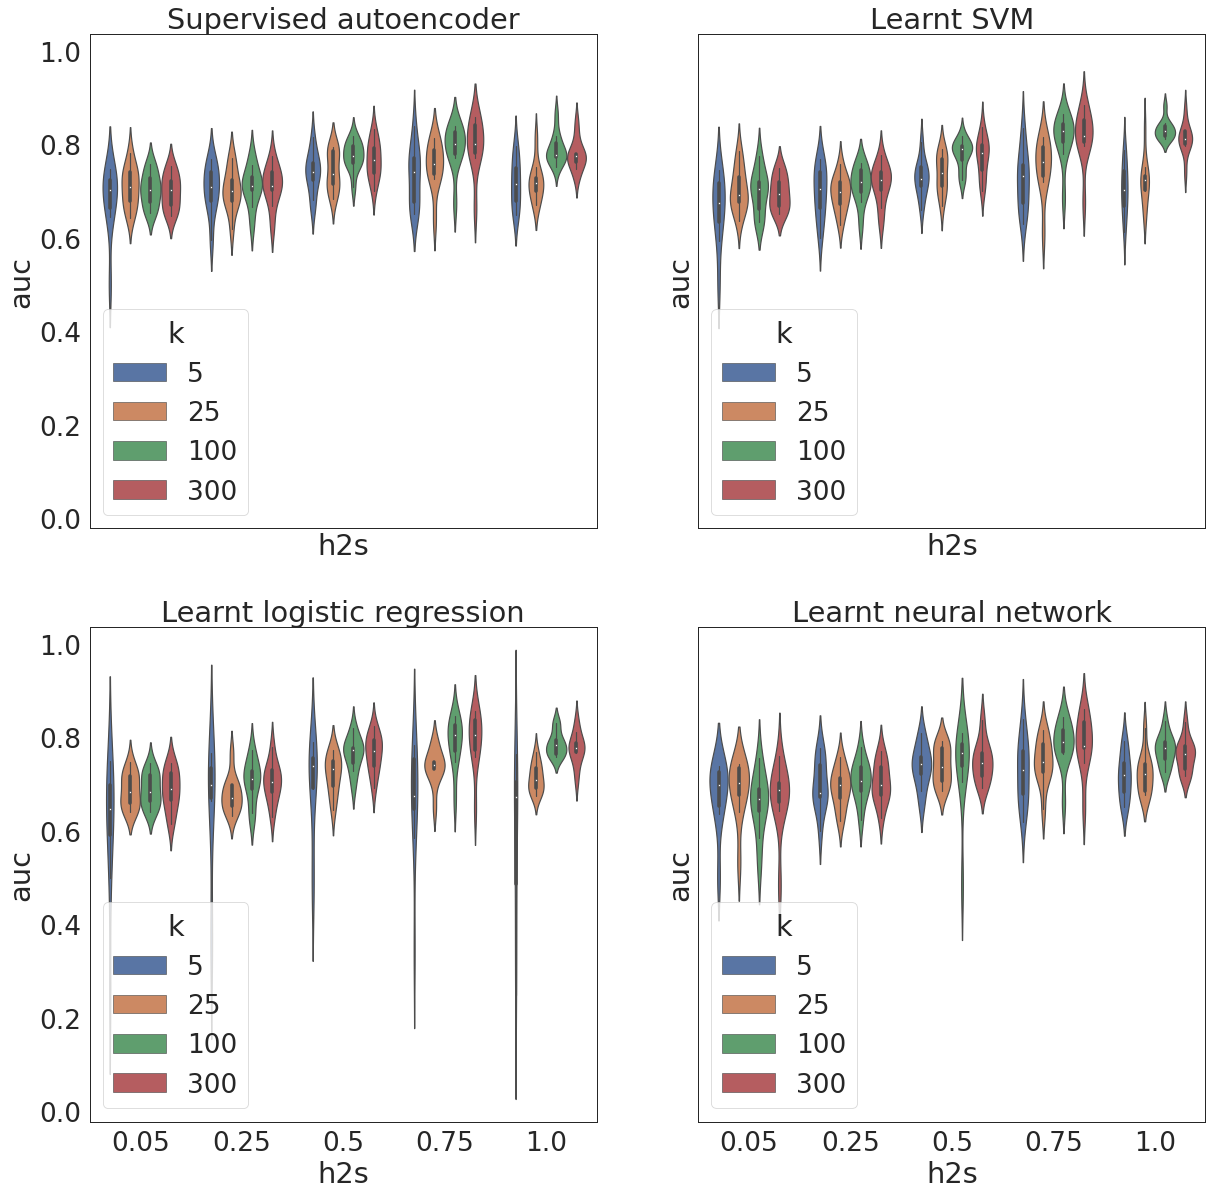

In [64]:
sns.set_theme(context="paper", style="white", font_scale=3)
fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharex=True, sharey=True)
titles = ["Supervised autoencoder", "Learnt SVM", "Learnt logistic regression", "Learnt neural network"]
methods = ["sae", "learnt_svm", "learnt_lr", "learnt_nn"]

for method, title, ax in zip(methods, titles, axes.ravel()):
    plt.sca(ax)
    sns.violinplot(x="h2s", y=method, hue="k", data=learnt)
    ax.set_title(title)
    ax.set_ylabel("auc")

plt.savefig("/home/shussain/final_report/p_vs_sae_results/learnt/experiment1/violins2.jpeg")

In [17]:

def get_dset(h2s, sim_i):
    P = f"/home/shussain/Simulated_data/15042021/{h2s}/simulation_output{sim_i}"
    return get_dsets_(P)

get_dset(1, 1)["X_train"].shape

(480, 1000)

In [51]:
import pandas as pd
import seaborn as sns
learnt = pd.read_csv("/home/shussain/final_report/p_vs_sae_results/pca/experiment1/pca.csv")
learnt.head(10)

,h2s,simulation,k,pca_svm,pca_lr,pca_nn
0,0.05,1,5,0.450292,0.552492,0.513506
1,0.05,2,5,0.531727,0.533196,0.570212
2,0.05,3,5,0.510279,0.522388,0.511968
3,0.05,4,5,0.464895,0.493706,0.503776
4,0.05,5,5,0.415685,0.566498,0.421437
5,0.05,6,5,0.499444,0.648220,0.515295
6,0.05,7,5,0.593287,0.595245,0.490629
7,0.05,8,5,0.279576,0.691964,0.428013
8,0.05,9,5,0.564196,0.480000,0.541818
9,0.05,10,5,0.573441,0.579477,0.526588


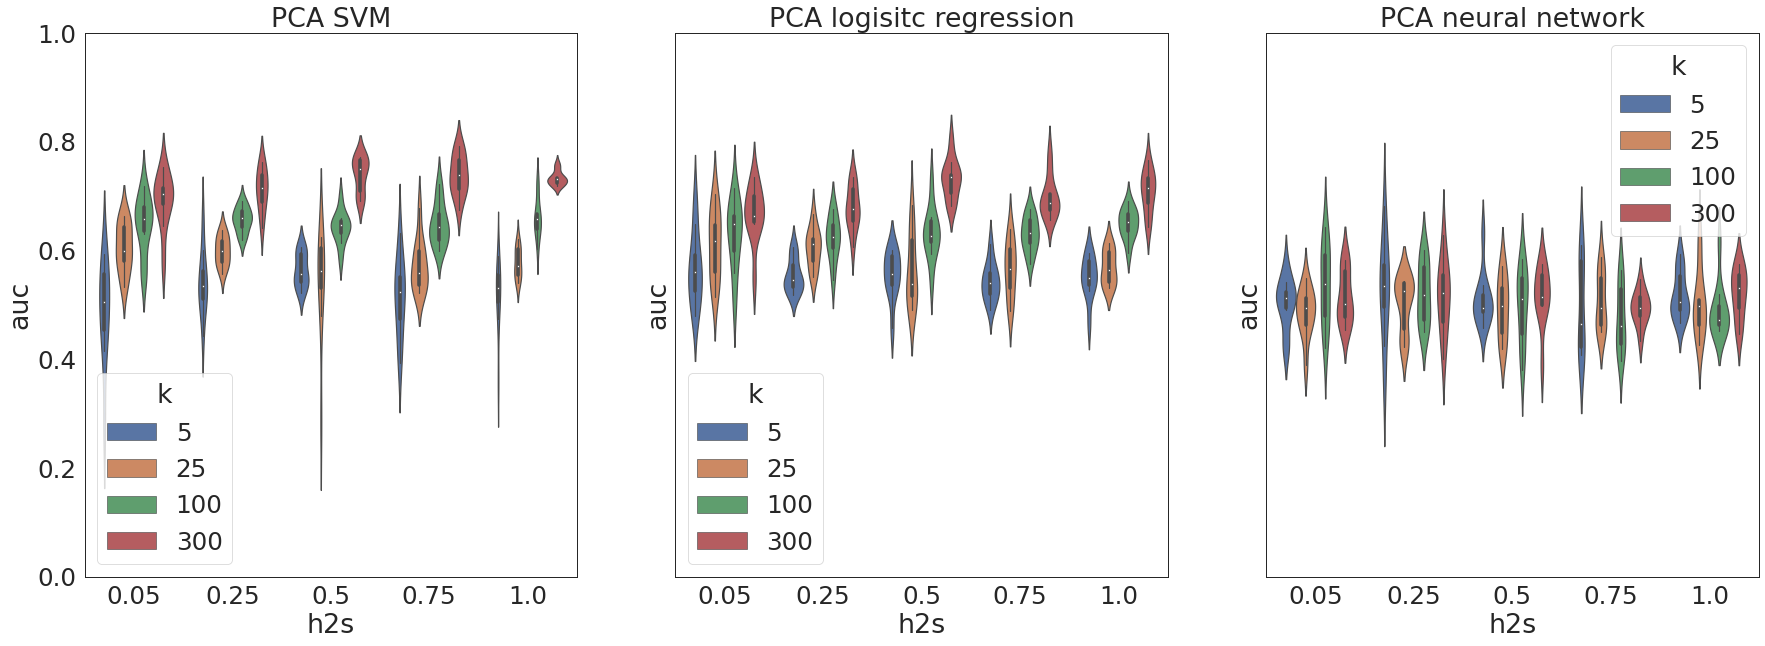

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10), sharex=True, sharey=True)
titles = ["PCA SVM", "PCA logisitc regression", "PCA neural network"]
for method, ax, title in zip(["pca_svm", "pca_lr", "pca_nn"], axes.ravel(), titles):
    plt.sca(ax)
    sns.violinplot(x="h2s", y=method, hue="k", data=learnt)
    plt.ylim((0, 1))
    ax.set_title(title)
    ax.set_ylabel("auc")

plt.savefig("/home/shussain/final_report/p_vs_sae_results/pca/experiment1/pca.jpeg")